# 9.2 Optimising with NumPy

*Estimated time for this notebook: 30 minutes*

## NumPy constructors

We saw previously that NumPy's core type is the `ndarray`, or N-Dimensional Array:

In [1]:
import numpy as np

In [2]:
ymin = 0
ymax = 10

xmin = 0
xmax = 4

resolution = 5

In [3]:
x = np.linspace(xmin, xmax, resolution)
y = np.linspace(ymin, ymax, resolution)
print(x)
print(y)
print(x.shape)
print(y.shape)

[0. 1. 2. 3. 4.]
[ 0.   2.5  5.   7.5 10. ]
(5,)
(5,)


In [4]:
xs, ys = np.meshgrid(x, y)

In [5]:
xs

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

We can add these together to make a grid containing the complex numbers we want to test for membership in the Mandelbrot set.

In [6]:
values = xs + 1j * ys
values

array([[0. +0.j , 1. +0.j , 2. +0.j , 3. +0.j , 4. +0.j ],
       [0. +2.5j, 1. +2.5j, 2. +2.5j, 3. +2.5j, 4. +2.5j],
       [0. +5.j , 1. +5.j , 2. +5.j , 3. +5.j , 4. +5.j ],
       [0. +7.5j, 1. +7.5j, 2. +7.5j, 3. +7.5j, 4. +7.5j],
       [0.+10.j , 1.+10.j , 2.+10.j , 3.+10.j , 4.+10.j ]])

The real magic of numpy arrays is that most python operations are applied, quickly, on an elementwise basis:

In [7]:
%%timeit
for i in range(resolution):
    for j in range(resolution):
        values[i][j] = values[i][j] + 10

20.4 µs ± 399 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Sometimes, you can use operators such as `+` as if we were dealing with single values. This is because the Numpy ndarrays have overridden the add operation.

In [8]:
%%timeit
values2 = values + 10

1.05 µs ± 61.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Numpy's mathematical functions also happen this way, and are said to be "vectorized" functions.

In [9]:
np.sqrt(values)

array([[2848.00105337+0.j        , 2848.00122893+0.j        ,
        2848.00140449+0.j        , 2848.00158006+0.j        ,
        2848.00175562+0.j        ],
       [2848.00105337+0.0004389j , 2848.00122893+0.0004389j ,
        2848.00140449+0.0004389j , 2848.00158006+0.0004389j ,
        2848.00175562+0.0004389j ],
       [2848.00105337+0.00087781j, 2848.00122893+0.00087781j,
        2848.00140449+0.00087781j, 2848.00158006+0.00087781j,
        2848.00175562+0.00087781j],
       [2848.00105337+0.00131671j, 2848.00122893+0.00131671j,
        2848.00140449+0.00131671j, 2848.00158006+0.00131671j,
        2848.00175562+0.00131671j],
       [2848.00105337+0.00175562j, 2848.00122893+0.00175562j,
        2848.00140449+0.00175562j, 2848.00158006+0.00175562j,
        2848.00175562+0.00175562j]])

But many (most?) Python functions do not know how to handle multi-dimensional arrays so we'll use Numpy implementations where they exist.

In [10]:
import math

math.sqrt(values)

TypeError: only size-1 arrays can be converted to Python scalars

## Arraywise Algorithms

We can use this to apply the mandelbrot algorithm to whole *ARRAYS*

In [11]:
z0 = values
z1 = z0 * z0 + values
z2 = z1 * z1 + values
z3 = z2 * z2 + values

In [12]:
print(z3)

[[1.87345188e+55+0.00000000e+00j 1.87345373e+55+0.00000000e+00j
  1.87345558e+55+0.00000000e+00j 1.87345743e+55+0.00000000e+00j
  1.87345928e+55+0.00000000e+00j]
 [1.87345188e+55+4.61947075e+49j 1.87345373e+55+4.61947473e+49j
  1.87345558e+55+4.61947872e+49j 1.87345743e+55+4.61948271e+49j
  1.87345928e+55+4.61948669e+49j]
 [1.87345188e+55+9.23894150e+49j 1.87345373e+55+9.23894947e+49j
  1.87345558e+55+9.23895744e+49j 1.87345743e+55+9.23896542e+49j
  1.87345928e+55+9.23897339e+49j]
 [1.87345188e+55+1.38584122e+50j 1.87345373e+55+1.38584242e+50j
  1.87345558e+55+1.38584362e+50j 1.87345743e+55+1.38584481e+50j
  1.87345928e+55+1.38584601e+50j]
 [1.87345188e+55+1.84778830e+50j 1.87345373e+55+1.84778989e+50j
  1.87345558e+55+1.84779149e+50j 1.87345743e+55+1.84779308e+50j
  1.87345928e+55+1.84779468e+50j]]


So can we just apply our `mandel1` function to the whole matrix?

In [13]:
def mandel(start, max_iterations=50):
    """Todo Explain the return value."""

    # ToDo Pam, should we start at c or 0?
    value = 0

    counter = 0
    while counter < max_iterations:
        if abs(value) > 2:
            break

        value = (value ** 2) + start

        counter = counter + 1

    return counter



assert mandel1(0) == 50
assert mandel1(3) == 1
assert mandel1(0.5) == 5

NameError: name 'mandel1' is not defined

In [14]:
ymin = -1.5
ymax = 1

xmin = -1.5
xmax = 0.5

resolution = 300

x = np.linspace(xmin, xmax, resolution)
y = np.linspace(ymin, ymax, resolution)

# xs, ys = np.meshgrid(xs, ys)

# todo make sure the values are the same as if we used list comps

# temp
xstep = (xmax - xmin) / resolution
ystep = (ymax - ymin) / resolution
# A numpy "meshgrid" creates a rectangular grid from an array of
ys, xs = np.mgrid[ymin:ymax:ystep, xmin:xmax:xstep]


values = xs + ys * 1j
# values

In [15]:
mandel(values)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

No. The *logic* of our current routine would require stopping for some elements and not for others. 

What if we just apply the Mandelbrot algorithm without checking for divergence until the end:

In [16]:
def mandel_numpy_explode(start, max_iterations=50):
    """Has the series exploded after all iterations."""
    value = 0

    counter = 0
    while counter < max_iterations:

        value = (value ** 2) + start

        counter = counter + 1

    return abs(value) < 2


In [17]:
data6 = mandel_numpy_explode(values)

/var/folders/ql/yttdbskd417c9sp5thrxtvkh0000gr/T/ipykernel_57246/2640023168.py:8: RuntimeWarning: overflow encountered in square
  value = (value ** 2) + start
/var/folders/ql/yttdbskd417c9sp5thrxtvkh0000gr/T/ipykernel_57246/2640023168.py:8: RuntimeWarning: invalid value encountered in square
  value = (value ** 2) + start


OK, we need to prevent it from running off to $\infty$

## Exercise

Can you use this techinque to stop our values going to infinity?

In [18]:
# hint
a = np.linspace(1,10,10)
a > 5

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [19]:
# hint 
a[a > 5] = 5
a

array([1., 2., 3., 4., 5., 5., 5., 5., 5., 5.])

In [20]:
def mandel_binary(position, limit=50):
    value = position
    while limit > 0:
        limit -= 1
        value = value**2 + position
        diverging = abs(value) > 2
        # Avoid overflow
        value[diverging] = 2

    return abs(value) < 2

In [21]:
data6 = mandel_binary(values)

In [22]:
%%timeit

data6 = mandel_binary(values)

35.8 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


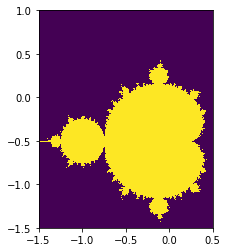

In [23]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.imshow(data6, interpolation="none", extent=[xmin, xmax, ymin, ymax])

Wow, that was TEN TIMES faster.

## More Mandelbrot

Of course, we didn't calculate the number-of-iterations-to-diverge, just whether the point was in the set.

Let's correct our code to do that:


In [24]:
def mandel_numpy(position, limit=50):
    # todo rename / reformat this to match our first mandel
    
    value = position
    # An array which keeps track of the first step at which each position diverged
    diverged_at_count = np.zeros(position.shape)
    while limit > 0:
        limit -= 1
        value = value**2 + position
        diverging = abs(value) > 2
        
        # Any positions which are:
        # - diverging
        # - haven't diverged before
        # are diverging for the first time
        first_diverged_this_time = np.logical_and(
            diverging,
            diverged_at_count == 0
        )
        
        # Update diverged_at_count for all positions which first diverged at this step
        diverged_at_count[first_diverged_this_time] = limit
        # Reset any divergent values to exactly 2
        
        # todo would this be faster to set this to 0?
        value[diverging] = 2

    return diverged_at_count

In [32]:
%%timeit
mandel_numpy(values)

49.3 ms ± 4.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
def mandel_numpy_better(position, limit=50):
    # todo rename / reformat this to match our first mandel
    # make this give the right answer!
    
    value = position
    # An array which keeps track of the first step at which each position diverged
    diverged_at_count = np.zeros(position.shape)
    while limit > 0:
        limit -= 1
        value = value**2 + position
        diverging = abs(value) > 2
        
        # Any positions which are:
        # - diverging
        first_diverged_this_time = np.logical_and(
            diverging,
            diverged_at_count == 0
        )
        
        # Update diverged_at_count for all positions which first diverged at this step
        diverged_at_count[diverging] = limit
        # Reset any divergent values to exactly 2
        
        # stop it from diverging again
        value[diverging] = 0

    return diverged_at_count

In [35]:
data100 = mandel_numpy_better(values)

In [31]:
%%timeit
mandel_numpy_better(values)

41.7 ms ± 2.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


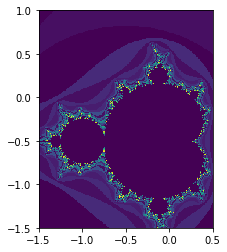

In [36]:
plt.imshow(data100, interpolation="none", extent=[xmin, xmax, ymin, ymax])

In [27]:
data7 = mandel_numpy(values)

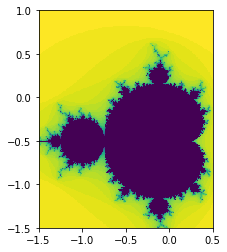

In [28]:
plt.imshow(data7, interpolation="none", extent=[xmin, xmax, ymin, ymax])

In [ ]:
%%timeit

data7 = mandel4(values)

Note that here, all the looping over mandelbrot steps was in Python, but everything below the loop-over-positions happened in C. The code was amazingly quick compared to pure Python.

## NumPy Testing

Now, let's look at calculating those residuals, the differences between the different datasets.

In [ ]:
data8 = mandel5(values)
data5 = mandel2(values)

In [ ]:
np.sum((data8 - data5) ** 2)

For our non-numpy datasets, numpy knows to turn them into arrays:

In [ ]:
xmin = -1.5
ymin = -1.0
xmax = 0.5
ymax = 1.0
resolution = 300
xstep = (xmax - xmin) / resolution
ystep = (ymax - ymin) / resolution
xs = [(xmin + (xmax - xmin) * i / resolution) for i in range(resolution)]
ys = [(ymin + (ymax - ymin) * i / resolution) for i in range(resolution)]
data1 = [[mandel1(complex(x, y)) for x in xs] for y in ys]
sum(sum((data1 - data7) ** 2))

But this doesn't work for pure non-numpy arrays

In [ ]:
data2 = []
for y in ys:
    row = []
    for x in xs:
        row.append(mandel1(complex(x, y)))
    data2.append(row)

In [ ]:
data2 - data1

So we have to convert to NumPy arrays explicitly:

In [ ]:
sum(sum((np.array(data2) - np.array(data1)) ** 2))

NumPy provides some convenient assertions to help us write unit tests with NumPy arrays:

In [ ]:
x = [1e-5, 1e-3, 1e-1]
y = np.arccos(np.cos(x))
y

In [ ]:
np.testing.assert_allclose(x, y, rtol=1e-6, atol=1e-20)

In [ ]:
np.testing.assert_allclose(data7, data1)

## Arraywise operations are fast

Note that we might worry that we carry on calculating the mandelbrot values for points that have already diverged.

In [37]:
def mandel6(position, limit=50):
    
    # todo add comments here
    value = np.zeros(position.shape) + position
    calculating = np.ones(position.shape, dtype="bool")
    diverged_at_count = np.zeros(position.shape)
    while limit > 0:
        limit -= 1
        value[calculating] = value[calculating] ** 2 + position[calculating]
        diverging_now = np.zeros(position.shape, dtype="bool")
        
        # undo this bit, put it back to *
        diverging_now[calculating] = (
            value[calculating] * np.conj(value[calculating]) > 4
        )
        
        calculating = np.logical_and(calculating, np.logical_not(diverging_now))
        diverged_at_count[diverging_now] = limit

    return diverged_at_count

In [ ]:
data8 = mandel6(values)

In [ ]:
%%timeit

data8 = mandel6(values)

In [ ]:
plt.imshow(data8, interpolation="none", extent=[xmin, xmax, ymin, ymax])

This was **not faster** even though it was **doing less work**

This often happens: on modern computers, **branches** (if statements, function calls) and **memory access** is usually the rate-determining step, not maths.

Complicating your logic to avoid calculations sometimes therefore slows you down. The only way to know is to **measure**

You need to *experiment* to see which optimisations will work. Performance programming needs to be empirical.

## Why is Numpy fast?